In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/hp/Desktop/BEPEC/Automobileclean1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   symboling          201 non-null    int64  
 2   normalized-losses  201 non-null    int64  
 3   make               201 non-null    object 
 4   fuel-type          201 non-null    object 
 5   aspiration         201 non-null    object 
 6   num-of-doors       201 non-null    int64  
 7   body-style         201 non-null    object 
 8   drive-wheels       201 non-null    object 
 9   engine-location    201 non-null    object 
 10  wheel-base         201 non-null    float64
 11  length             201 non-null    float64
 12  width              201 non-null    float64
 13  height             201 non-null    float64
 14  curb-weight        201 non-null    int64  
 15  engine-type        201 non-null    object 
 16  num-of-cylinders   201 non

In [4]:
y=df['price']
X=df.drop(columns=['price'])

In [5]:
df['symboling']=df['symboling'].astype('object')
df['num-of-doors']=df['num-of-doors'].astype("object")
df['num-of-cylinders']=df['num-of-cylinders'].astype("object")

In [6]:
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head(2)

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system
0,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi


In [7]:
#onehot encoding categorical features
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
X=X.drop(columns=cars_categorical)
X.head(2)

,Unnamed: 0,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km
0,0,3,122,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000.0,11.190476,8.703704
1,1,3,122,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000.0,11.190476,8.703704


In [9]:
dfX=pd.merge(X,cars_dummies,on=X.index)
dfX.columns

Index(['key_0', 'Unnamed: 0', 'symboling', 'normalized-losses', 'num-of-doors',
       'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'num-of-cylinders', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-L/100km',
       'highway-L/100km', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'fuel-type_gas', 'aspiration_turbo', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-location_rear',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-type_ohcv', 'engine-type_rotor', 'fuel-system_2bbl',
      

In [10]:
dfX.drop(columns='Unnamed: 0',inplace=True)


#### Feature Scaling is not compulsory but makes the procees easier for linera regression

In [11]:
from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after 
# scaling (the df is converted to a numpy array)
cols=dfX.columns
dfX_scaled=pd.DataFrame(scale(dfX))
dfX_scaled.columns=cols
dfX_scaled.columns

Index(['key_0', 'symboling', 'normalized-losses', 'num-of-doors', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-L/100km', 'highway-L/100km', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'fuel-type_gas',
       'aspiration_turbo', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'drive-wheels_fwd',
       'drive-wheels_rwd', 'engine-location_rear', 'engine-type_l',
       'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv',
       'engine-type_rotor', 'fuel-system_2bbl', 'fuel-system_4bbl',


In [12]:
dfX_scaled.describe()

,key_0,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
count,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,...,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02
mean,8.285246e-17,1.855895e-16,8.837596e-17,1.944271e-16,2.209399e-16,-1.414015e-16,7.754991e-16,2.573950e-16,2.982689e-16,-4.139861e-16,...,2.474527e-16,-1.331163e-16,1.546579e-17,5.413028e-17,8.754744e-17,-1.198599e-16,8.174776e-17,-6.241552e-16,-2.057503e-16,8.174776e-17
std,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,...,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00
min,-1.723455e+00,-2.269593e+00,-1.785907e+00,-1.156378e+00,-2.015617e+00,-2.693002e+00,-2.666233e+00,-2.443627e+00,-2.069088e+00,-2.236142e+00,...,-2.839809e-01,-2.629619e-01,-1.424941e-01,-6.834861e-01,-1.230915e-01,-3.324112e-01,-7.071068e-02,-9.187147e-01,-2.165064e-01,-7.071068e-02
25%,-8.617275e-01,-6.717359e-01,-6.579657e-01,-1.156378e+00,-7.101029e-01,-6.021238e-01,-8.534602e-01,-7.235321e-01,-7.493419e-01,-3.436598e-01,...,-2.839809e-01,-2.629619e-01,-1.424941e-01,-6.834861e-01,-1.230915e-01,-3.324112e-01,-7.071068e-02,-9.187147e-01,-2.165064e-01,-7.071068e-02
50%,0.000000e+00,1.271926e-01,0.000000e+00,8.647694e-01,-2.969656e-01,-8.143809e-02,-1.855967e-01,1.365155e-01,-2.745434e-01,-3.436598e-01,...,-2.839809e-01,-2.629619e-01,-1.424941e-01,-6.834861e-01,-1.230915e-01,-3.324112e-01,-7.071068e-02,-9.187147e-01,-2.165064e-01,-7.071068e-02
75%,8.617275e-01,9.261211e-01,4.699755e-01,8.647694e-01,5.954111e-01,7.565404e-01,3.391531e-01,7.098805e-01,7.176887e-01,-3.436598e-01,...,-2.839809e-01,-2.629619e-01,-1.424941e-01,1.463087e+00,-1.230915e-01,-3.324112e-01,-7.071068e-02,1.088477e+00,-2.165064e-01,-7.071068e-02
max,1.723455e+00,1.725050e+00,4.198448e+00,8.647694e-01,3.652627e+00,2.757926e+00,2.915198e+00,2.470930e+00,2.926955e+00,7.226270e+00,...,3.521363e+00,3.802833e+00,7.017834e+00,1.463087e+00,8.124038e+00,3.008322e+00,1.414214e+01,1.088477e+00,4.618802e+00,1.414214e+01


#### MODEL BUILDING

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX_scaled, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=10)

In [14]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)

y_pred_test=lm.predict(X_test)
y_pred_train=lm.predict(X_train)

In [15]:
## Evaluation metrics
#Rsqaure
from sklearn.metrics import r2_score
print('R-sqaure on train data: {}'.format(r2_score(y_true=y_train, y_pred=y_pred_train)))
print('R-sqaure on test data: {}'.format(r2_score(y_true=y_test, y_pred=y_pred_test)))
#Standard error/RMSE
error_train=y_pred_train-y_train
error_test=y_pred_test-y_test
print('RMSE on train data: {}'.format(((error_train**2).mean())**0.5))
print('RMSE on test data: {}'.format(((error_test**2).mean())**0.5))

R-sqaure on train data: 0.968105760717681
R-sqaure on test data: 0.8020482589791893
RMSE on train data: 1470.717891892611
RMSE on test data: 3182.540969592306


#### Massive overfitting: All features in model 
##### is never a good idea unless features are too less and all of them are important, 
##### so using Recursive feature elimination to reduce dimensionality

In [16]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
n_features_list = list(range(4, 31)) #checking for optimal number of features between 4 to 30
train_adjusted_r2 = []
train_r2 = []
test_r2 = []
train_RMSE=[]
test_RMSE=[]
for n_features in range(4, 31):
    # RFE with n features
    lm = LinearRegression()
    # specifying number of features
    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)
    # fit with n features
    rfe_n.fit(X_train, y_train)
    # selecting features selected by rfe_n
    col_n = X_train.columns[rfe_n.support_] #rfe_n.support_: returns an array with boolean values to indicate whether 
    #an attribute was selected using RFE
    # training & test data for n selected columns
    X_train_rfe_n = X_train[col_n]
    X_test_rfe_n = X_test[col_n]
    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)
    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add') 
    # fitting the model with n featues
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    # # Making predictions
    y_pred_test = lm_n.predict(X_test_rfe_n)
    y_pred_train = lm_n.predict(X_train_rfe_n)
    #Calculating evaluation metrics
    #R-square
    train_adjusted_r2.append(lm_n.rsquared_adj)
    train_r2.append(lm_n.rsquared)
    test_r2.append(r2_score(y_test, y_pred_test))
    #RMSE/stan. error
    error_test=y_pred_test-y_test
    error_train=y_pred_train-y_train
    test_RMSE.append(((error_test**2).mean())**0.5)
    train_RMSE.append(((error_train**2).mean())**0.5)
    

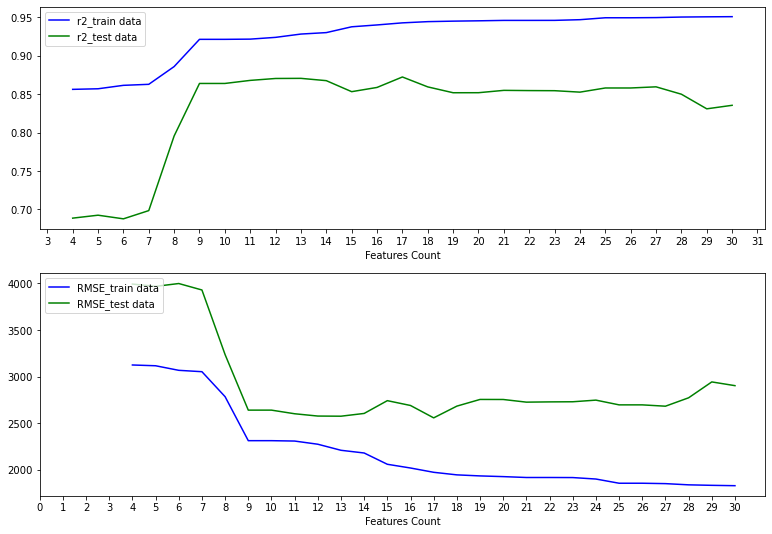

In [17]:
# plotting r2 and RMSE against n_features
import matplotlib.ticker as plticker

fig,ax=plt.subplots(2,1,figsize=(13, 9))
ax[0].plot(n_features_list, train_r2,'b', label="r2_train data")
ax[0].plot(n_features_list, test_r2,'g', label="r2_test data")
ax[0].set_xlabel('Features Count')

ax[0].legend(loc='upper left')
loc = plticker.MultipleLocator(base=1)
ax[0].xaxis.set_major_locator(loc) #method 1 of ticks

ax[1].plot(n_features_list, train_RMSE, 'b',label="RMSE_train data")
ax[1].plot(n_features_list, test_RMSE, 'g',label="RMSE_test data")
ax[1].set_xlabel('Features Count')


ax[1].legend(loc='upper left')
plt.xticks(np.arange(0, 31, step=1))#method 2 of ticks

plt.show()

In [18]:
#9 features is best high r2 and low rmse

In [19]:
lm=LinearRegression()
rfe=RFE(lm,9)
rfe.fit(X_train,y_train)
col=X_train.columns[rfe.support_] #obtaining fetaure names of 9 most imp 
#making new Df's with  9 most imp features as per RFE algorithm
X_train_9= X_train[col]
X_test_9 = X_test[col]
# add a constant to the model
X_train_9 = sm.add_constant(X_train_9,has_constant='add')
X_test_9 = sm.add_constant(X_test_9,has_constant='add')
#fit OLS model
lm_sm=sm.OLS(y_train,X_train_9).fit()
#making predictions
y_pred_train=lm_sm.predict(X_train_9)
y_pred_test=lm_sm.predict(X_test_9)
#evlaution metrics
#R-sqaure
train_r2=lm_sm.rsquared
test_r2=r2_score(y_pred_test, y_test)
#RMSE/stan. error
error_test=y_pred_test-y_test
error_train=y_pred_train-y_train
test_RMSE=(((error_test**2).mean())**0.5)
train_RMSE=(((error_train**2).mean())**0.5)
print('----------------------R-sqaure-------------------------------------------')
print("R-sq for test data is {}".format(test_r2))
print("R-sq for train data is {}".format(train_r2))
print('----------------------STANDARD ERROR/RMSE-------------------------------------------')
print("RMSE for test data is {}".format(test_RMSE))
print("RMSE for train data is {}".format(train_RMSE))
print(lm_sm.summary())

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=9 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


----------------------R-sqaure-------------------------------------------
R-sq for test data is 0.8749911932159102
R-sq for train data is 0.9211345802299967
----------------------STANDARD ERROR/RMSE-------------------------------------------
RMSE for test data is 2639.9982369415166
RMSE for train data is 2312.6854142703774
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     168.7
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           3.21e-67
Time:                        00:55:19   Log-Likelihood:                -1283.1
No. Observations:                 140   AIC:                             2586.
Df Residuals:                     130   BIC:                             2616.
Df Model:                           9      

Text(0.5, 1.0, 'Price: Actuals vs Predictions on test data')

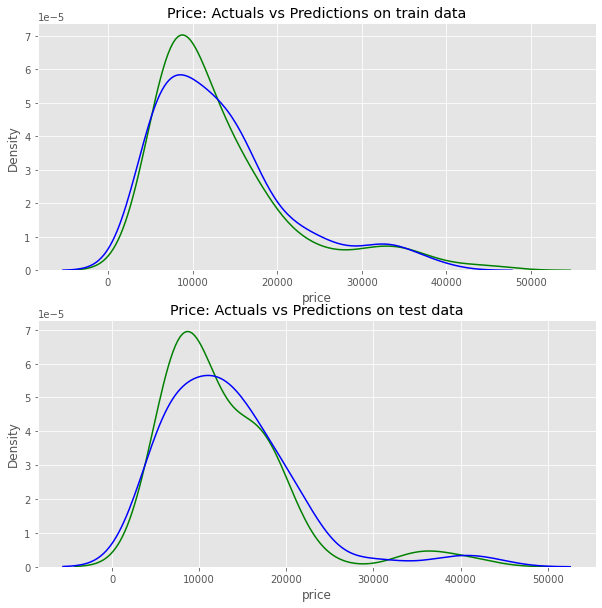

In [20]:
plt.style.use('ggplot')
fig,ax=plt.subplots(2,1,figsize=(10,10))
sns.kdeplot(y_train,color='g',ax=ax[0])
sns.kdeplot(y_pred_train,color='b',ax=ax[0])
ax[0].set_title('Price: Actuals vs Predictions on train data')
sns.kdeplot(y_test,color='g',ax=ax[1])
sns.kdeplot(y_pred_test,color='b',ax=ax[1])
ax[1].set_title('Price: Actuals vs Predictions on test data')

In [21]:
features_9=lm_sm.params.index
features_9=features_9[1:] #we don't want constant (const) in our imp features list so removing it
features_9

Index(['width', 'engine-size', 'compression-ratio', 'city-L/100km', 'make_bmw',
       'make_peugot', 'engine-location_rear', 'engine-type_l',
       'fuel-system_idi'],
      dtype='object')

In [22]:
X_train[features_9].head(2)

,width,engine-size,compression-ratio,city-L/100km,make_bmw,make_peugot,engine-location_rear,engine-type_l,fuel-system_idi
110,1.197835,-0.165904,-0.441623,0.958861,-0.203595,4.156047,-0.123091,3.968627,-0.332411
95,-0.996574,-0.720878,-0.191309,-0.934823,-0.203595,-0.240613,-0.123091,-0.251976,-0.332411


### checking for linearity

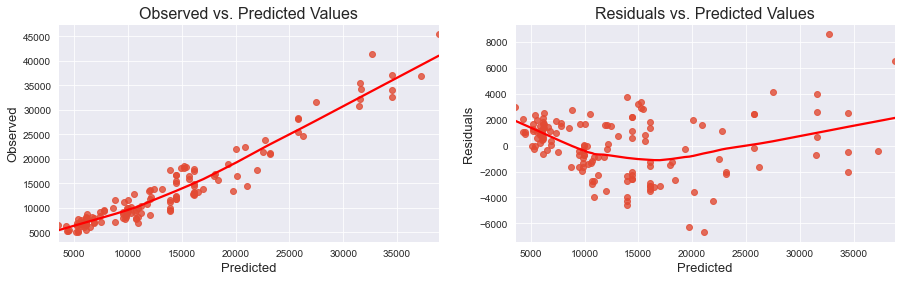

In [23]:
def linearity_test(model, y):
    
    fitted_vals = model.predict()
    residuals = model.resid
    
    sns.set_style('darkgrid')
    fig,ax=plt.subplots(1,2, figsize=(15,4))
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set_xlabel('Predicted', fontsize=13)
    ax[0].set_ylabel('Observed', fontsize=13)
    
    sns.regplot(x=fitted_vals,y=residuals,lowess=True,ax=ax[1],line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set_xlabel('Predicted', fontsize=13)
    ax[1].set_ylabel('Residuals', fontsize=13)
    
linearity_test(lm_sm, y_train)

### checking for homoscadasticity

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


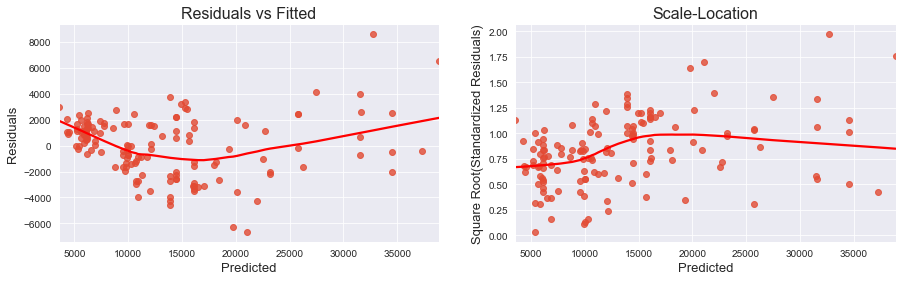

In [24]:
import statsmodels.stats.api as sms

def homoscedasticity_test(model):
    
    fitted_vals = model.predict()
    residuals = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal
    
    sns.set_style('darkgrid')
    
    
    fig, ax = plt.subplots(1,2,figsize=(15,4))

    sns.regplot(x=fitted_vals, y=residuals, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set_xlabel('Predicted', fontsize=13)
    ax[0].set_ylabel('Residuals', fontsize=13)

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set_xlabel('Predicted', fontsize=13)
    ax[1].set_ylabel('Square Root(Standardized Residuals)', fontsize=13)

      
homoscedasticity_test(lm_sm)

### checking for normality using Q-Qplots

In [25]:
from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');
    

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned Anderson Draling statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')

Jarque-Bera test ---- statistic: 5.1887, p-value: 0.07469424613820586
Shapiro-Wilk test ---- statistic: 0.9785, p-value: 0.0264
Kolmogorov-Smirnov test ---- statistic: 0.5214, p-value: 0.0000
Anderson-Darling test ---- statistic: 0.8045, 5% critical value: 0.7660
If the returned Anderson Draling statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


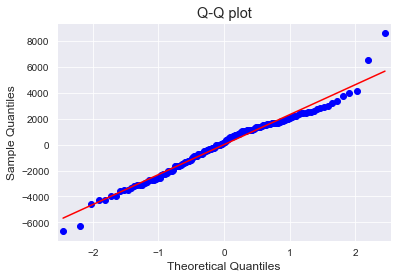

In [26]:
normality_of_residuals_test(lm_sm)

### checking for outliers using cook's distance

In [27]:
# Function to plot standardized residuals vs Leverage and cook's distance for outlier detection

def influential_outlier_test(model,top_influencing_obs_count):
    
    influence = model.get_influence()

#leverage (hat values)
    leverage = influence.hat_matrix_diag

#When cases are outside of the Cook’s distance (meaning they have high Cook’s distance scores), 
#the cases are influential to the regression results. The regression results will be altered if we exclude those cases.
    cooks_d = influence.cooks_distance

#standardized residuals= (Residual/STD of Residuals)
    standardized_residuals = influence.resid_studentized_internal

#studentized residuals
    studentized_residuals = influence.resid_studentized_external 
    
    
    plot_lm = plt.figure(figsize=(15,5))
    plt.scatter(leverage, standardized_residuals, alpha=0.5)
    sns.regplot(leverage, standardized_residuals,scatter=False,ci=False,lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    plot_lm.axes[0].set_xlim(0, max(leverage)+0.01)
    plot_lm.axes[0].set_ylim(-10, 6)
    plot_lm.axes[0].set_title('Standardized Residuals vs Leverage',fontsize=16)
    plot_lm.axes[0].set_xlabel('Leverage',fontsize=13)
    plot_lm.axes[0].set_ylabel('Standardized Residuals',fontsize=13);

    # annotations- #annotating index position of the top n cook's D points 
    
    leverage_top_n_obs = np.flip(np.argsort(cooks_d[0]), 0)[:top_influencing_obs_count]  
    
    for i in leverage_top_n_obs:
        plot_lm.axes[0].annotate(i,xy=(leverage[i],studentized_residuals[i])) 
    
    
# shenanigans for cook's distance contours
    def graph(formula, x_range, label=None):
        x = x_range
        y = formula(x)
        plt.plot(x, y, label=label, lw=1, ls='--', color='red')

    p = len(lm_sm.params) # number of model parameters

    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), np.linspace(0.001, max(leverage), 50),'Cook\'s distance')#cookd= 0.5 line
    plt.legend(loc='upper right');



C:\Users\hp\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-27-32a2255887f4>:47: RuntimeWarning: invalid value encountered in sqrt
  graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), np.linspace(0.001, max(leverage), 50),'Cook\'s distance')#cookd= 0.5 line


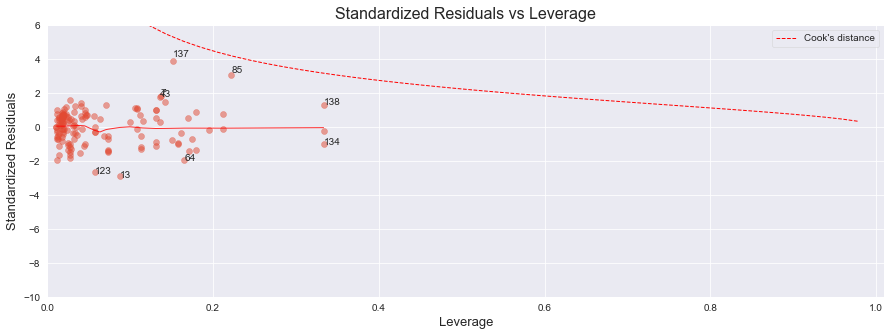

In [28]:
influential_outlier_test(model=lm_sm,top_influencing_obs_count=10)
#I am annotating top 10  

#ignore warning it because you can't calculate the square root of a negative number (stackoveflow)

In [29]:
#no indexes outside cook's line but 137,85 near to cook's line and have high residuals so sropping them
X_train_no_outliers=X_train.drop(index=[137,85])
y_train_no_outliers=y_train.drop(index=[137,85])

In [30]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

n_features_list = list(range(4, 31)) #checking for optimal number of features between 4 to 30
train_adjusted_r2 = []
train_r2 = []
test_r2 = []
train_RMSE=[]
test_RMSE=[]

for n_features in range(4, 31):

    # RFE with n features
    lm = LinearRegression()

    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)  # specifying number of features

    # fit with n features
    rfe_n.fit(X_train_no_outliers, y_train_no_outliers)

    # selecting the features provided by rfe_n
    col_n = X_train_no_outliers.columns[rfe_n.support_] #rfe_n.support_: returns an array with boolean values to indicate whether 
    #an attribute was selected using RFE

    # subsetting training & test data for n selected columns
    X_train_rfe_n = X_train_no_outliers[col_n]
    X_test_rfe_n = X_test[col_n]


    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n,has_constant='add')


    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

    
    
    # fitting the model with n featues
    lm_n = sm.OLS(y_train_no_outliers, X_train_rfe_n).fit()
    
    
    # # Making predictions
    y_pred_test = lm_n.predict(X_test_rfe_n)
    y_pred_train = lm_n.predict(X_train_rfe_n)
    
    
    #Calculating evaluation metrics
    
    #R-square
    train_adjusted_r2.append(lm_n.rsquared_adj)
    train_r2.append(lm_n.rsquared)
    test_r2.append(r2_score(y_test, y_pred_test))
    
    #RMSE/stan. error
    error_test=y_pred_test-y_test
    error_train=y_pred_train-y_train_no_outliers
    
    test_RMSE.append(((error_test**2).mean())**0.5)
    train_RMSE.append(((error_train**2).mean())**0.5)

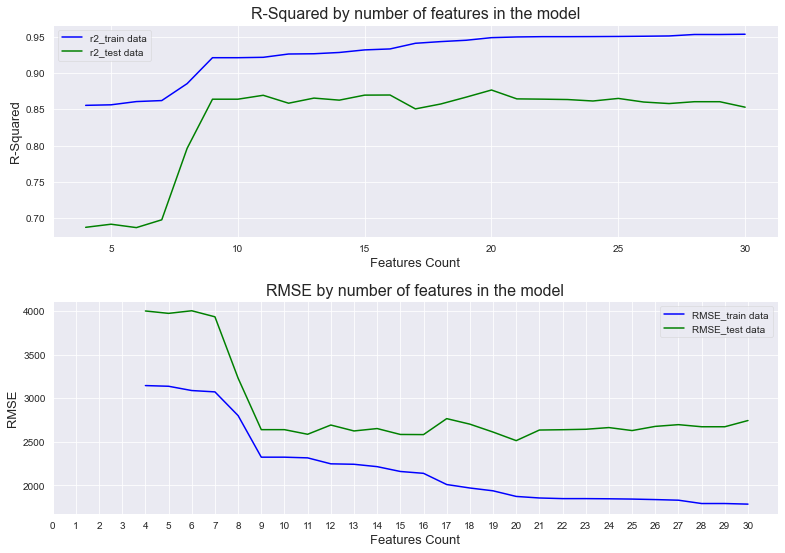

In [31]:
# plotting r2 and RMSE against n_features
fig,ax=plt.subplots(2,1,figsize=(13, 9))
plt.subplots_adjust(hspace = 0.3)
ax[0].plot(n_features_list, train_r2,'b', label="r2_train data")
ax[0].plot(n_features_list, test_r2,'g', label="r2_test data")
ax[0].set_xlabel('Features Count',fontsize=13)
ax[0].set_ylabel('R-Squared',fontsize=13)
ax[0].set_title('R-Squared by number of features in the model',fontsize=16)


ax[1].plot(n_features_list, train_RMSE, 'b',label="RMSE_train data")
ax[1].plot(n_features_list, test_RMSE, 'g',label="RMSE_test data")
ax[1].set_xlabel('Features Count',fontsize=13)
ax[1].set_ylabel('RMSE',fontsize=13)
ax[1].set_title('RMSE by number of features in the model',fontsize=16)

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper right')
plt.xticks(np.arange(0,31,1))

plt.show()

In [32]:
RMSE_test_dividedby_train = [i / j for i, j in zip(test_RMSE, train_RMSE)]
RMSE_test_dividedby_train

[1.2718702421355672,
 1.266368409084785,
 1.2961631750068068,
 1.2801002301331241,
 1.153170348670113,
 1.1357257923928439,
 1.1357257923928408,
 1.1167875358883106,
 1.1978406482615864,
 1.1703612395401017,
 1.197071432012742,
 1.1964625600952348,
 1.2075754611850376,
 1.3757072620727886,
 1.371383445180227,
 1.3474611877417835,
 1.3413722385491955,
 1.4195952870667863,
 1.4271595939973019,
 1.4299278762581402,
 1.4419825227399279,
 1.425946891473499,
 1.456443521875794,
 1.4730306473416697,
 1.4908531555382916,
 1.4908531555382933,
 1.53664418706156]

In [33]:
X_new_cv = dfX_scaled.drop(index=[137,85]) # DF for K fold cross validation (cv)
y_new_cv = y.drop(index=[137,85])

In [34]:
#Resetting index as we need to use K-fold and thus index needs to be in proper order
X_new_cv.reset_index(inplace=True, drop=True)
X_new_cv.head(20)

,key_0,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,-1.723455,1.725050,0.000000,-1.156378,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,-0.343660,...,-0.283981,-0.262962,-0.142494,-0.683486,-0.123091,-0.332411,-0.070711,1.088477,-0.216506,-0.070711
1,-1.706220,1.725050,0.000000,-1.156378,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,-0.343660,...,-0.283981,-0.262962,-0.142494,-0.683486,-0.123091,-0.332411,-0.070711,1.088477,-0.216506,-0.070711
2,-1.688986,0.127193,0.000000,-1.156378,-0.710103,-0.244152,-0.185597,-0.559713,0.518080,1.548823,...,-0.283981,3.802833,-0.142494,-0.683486,-0.123091,-0.332411,-0.070711,1.088477,-0.216506,-0.070711
3,-1.671751,0.926121,1.315931,0.864769,0.165748,0.195176,0.148335,0.218425,-0.423766,-0.343660,...,-0.283981,-0.262962,-0.142494,-0.683486,-0.123091,-0.332411,-0.070711,1.088477,-0.216506,-0.070711
4,-1.654517,0.926121,1.315931,0.864769,0.099646,0.195176,0.243744,0.218425,0.520017,0.602582,...,-0.283981,-0.262962,-0.142494,-0.683486,-0.123091,-0.332411,-0.070711,1.088477,-0.216506,-0.070711
5,-1.637282,0.926121,0.000000,-1.156378,0.165748,0.252126,0.196040,-0.273031,-0.094314,0.602582,...,-0.283981,-0.262962,-0.142494,-0.683486,-0.123091,-0.332411,-0.070711,1.088477,-0.216506,-0.070711
6,-1.620048,0.127193,1.127941,0.864769,1.157278,1.505026,2.628971,0.791790,0.558777,0.602582,...,-0.283981,-0.262962,-0.142494,-0.683486,-0.123091,-0.332411,-0.070711,1.088477,-0.216506,-0.070711
7,-1.602813,0.127193,0.000000,0.864769,1.157278,1.505026,2.628971,0.791790,0.771951,0.602582,...,-0.283981,-0.262962,-0.142494,-0.683486,-0.123091,-0.332411,-0.070711,1.088477,-0.216506,-0.070711
8,-1.585579,0.127193,1.127941,0.864769,1.157278,1.505026,2.628971,0.873699,1.027761,0.602582,...,-0.283981,-0.262962,-0.142494,-0.683486,-0.123091,-0.332411,-0.070711,1.088477,-0.216506,-0.070711
9,-1.568344,0.926121,2.193219,-1.156378,0.397105,0.211448,-0.519528,0.218425,-0.311364,-0.343660,...,-0.283981,-0.262962,-0.142494,-0.683486,-0.123091,-0.332411,-0.070711,1.088477,-0.216506,-0.070711


In [35]:
y_new_cv.reset_index(drop=True,inplace=True)
# y_new_cv.head(20)

### k-fold cross validation for n features using rfe

In [48]:
from sklearn.model_selection import KFold


K=5 #using 5 folds
kf = KFold(n_splits=K, shuffle=True, random_state=42)
   
for n_features in range(5,31):
    
    train_RMSE = []
    test_RMSE = []
    train_r2=[]
    test_r2=[]
    
    for train, test in kf.split(X_new_cv):
        
        lm = LinearRegression()
        
        rfe_n = RFE(estimator=lm, n_features_to_select=n_features)
        
        rfe_n.fit(X_new_cv.loc[train],y_new_cv[train])
        
        y_pred_train=rfe_n.predict(X_new_cv.loc[train])
        y_pred_test=rfe_n.predict(X_new_cv.loc[test])
        
        #R-square
        train_r2.append(r2_score(y_pred_train , y_new_cv[train]))
        test_r2.append(r2_score(y_pred_test , y_new_cv[test]))
        
        #Error
        error_train = y_pred_train - y_new_cv[train]
        error_test = y_pred_test - y_new_cv[test]
        rmse_train=((error_train**2).mean())**0.5
        rmse_test=((error_test**2).mean())**0.5
        
        train_RMSE.append(rmse_train)
        test_RMSE.append(rmse_test)
        
    test_times_train=np.mean(test_RMSE)/np.mean(train_RMSE)
         # generate report
    print('n_features:{:1} |mean_train_R2:{:2} |mean_test_R2:{:3} |mean(rmse_train):{:4} |mean(rmse_test):{:5} |RMSE(test/train):{}'.
          format(n_features, round(np.mean(train_r2),4), round(np.mean(test_r2),4),
                 round(np.mean(train_RMSE),0),
                 round(np.mean(test_RMSE),0),round(test_times_train,2)))

n_features:5 |mean_train_R2:0.8489 |mean_test_R2:0.7838 |mean(rmse_train):2851.0 |mean(rmse_test):3105.0 |RMSE(test/train):1.09
n_features:6 |mean_train_R2:0.8554 |mean_test_R2:0.7914 |mean(rmse_train):2799.0 |mean(rmse_test):3171.0 |RMSE(test/train):1.13
n_features:7 |mean_train_R2:0.8815 |mean_test_R2:0.8189 |mean(rmse_train):2558.0 |mean(rmse_test):2952.0 |RMSE(test/train):1.15
n_features:8 |mean_train_R2:0.8985 |mean_test_R2:0.8342 |mean(rmse_train):2382.0 |mean(rmse_test):2886.0 |RMSE(test/train):1.21
n_features:9 |mean_train_R2:0.9071 |mean_test_R2:0.8397 |mean(rmse_train):2286.0 |mean(rmse_test):2841.0 |RMSE(test/train):1.24
n_features:10 |mean_train_R2:0.9111 |mean_test_R2:0.8393 |mean(rmse_train):2239.0 |mean(rmse_test):2880.0 |RMSE(test/train):1.29
n_features:11 |mean_train_R2:0.9146 |mean_test_R2:0.8417 |mean(rmse_train):2197.0 |mean(rmse_test):2869.0 |RMSE(test/train):1.31
n_features:12 |mean_train_R2:0.9171 |mean_test_R2:0.8446 |mean(rmse_train):2168.0 |mean(rmse_test):283

From the above data we find:

 Our model overfits as we increase the number of features (judging by gap b/w test & train RMSE & R2)
  At n_features=5 test_RMSE is 25% more than train_RMSE meaning our predictions on test data are 25% more inaccurate (as RMSE(test/train)=1.25) and 33% wrong with 6 features.

Beyond 6 features this number is 35% or more which is massive overfitting(even with 5/6 features model there is huge gap between train & test RMSE-agreed)

To deal with this I ran the model with 5 and 6 features and found multicollinearity. Features: carwidth and curbweight are highly correlated and latter has a VIF of 7 plus. So when n=6, I remove 'curbweight' leaving us with n=5.

MORE DETAILS BELOW.

**Possible reason for overfitting: SINCE WE ONLY HAVE 200 ODD OBSERVATIONS AND TOTAL OF 68 VARIABLES WE CAN'T EXPECT A VERY ACCURATE MODEL. As per Jim Frost's (famous stats scholar/ & blogger) article on regression overfitting "Statisticians have conducted simulation studies* which indicate you should have at least 10-15 observations for each term in a linear model", so going ny this rule we need a much larger dataset in which each feature is adequatly represented.

In [37]:
import statsmodels.api as sm

lm = LinearRegression()

rfe = RFE(estimator=lm, n_features_to_select=6)

rfe.fit(X_new_cv, y_new_cv)

col= X_new_cv.columns[rfe.support_] 

X_final=X_new_cv[col] #X DF wuith top 6 features only

X_final= sm.add_constant(X_final,has_constant='add')

lm_sm=sm.OLS(y_new_cv,X_final).fit()

print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     269.8
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           1.04e-90
Time:                        00:56:16   Log-Likelihood:                -1846.3
No. Observations:                 199   AIC:                             3707.
Df Residuals:                     192   BIC:                             3730.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.322e+04 

### checking for multicollimearity using VIF and removing features with high VIF

In [38]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

def variance_inflation_factors(X_df): #X_df = X_train normally, in this model X=X_final
    '''
     '''
    X_df = add_constant(X_df)
    vifs = pd.Series(
        [1 / (1. - OLS(X_df[col].values, 
                       X_df.loc[:, X_df.columns != col].values).fit().rsquared) 
         for col in X_df],
        index=X_df.columns,
        name='VIF'
    )
    return vifs

In [39]:
variance_inflation_factors(X_final)

const                   1.000089
length                  5.981225
width                   5.172457
curb-weight             9.966915
engine-size             4.339983
make_bmw                1.118844
engine-location_rear    1.158709
Name: VIF, dtype: float64

In [40]:
#curbweight is having high correlation with length,width and enginesize and its correlation with price is 
#low compared to others
X_final =X_final.drop(columns="curb-weight")
X_final.head()

,const,length,width,engine-size,make_bmw,engine-location_rear
0,1.0,-0.439409,-0.853460,0.075389,-0.203595,-0.123091
1,1.0,-0.439409,-0.853460,0.075389,-0.203595,-0.123091
2,1.0,-0.244152,-0.185597,0.606234,-0.203595,-0.123091
3,1.0,0.195176,0.148335,-0.431327,-0.203595,-0.123091
4,1.0,0.195176,0.243744,0.220165,-0.203595,-0.123091


In [41]:
lm_sm=sm.OLS(y_new_cv,X_final).fit()

y_predictions=lm_sm.predict(X_final)


#Standard error/RMSE
error=y_predictions-y_new_cv

print('RMSE is: {}'.format(((error**2).mean())**0.5))

print(lm_sm.summary())

RMSE is: 2719.544530485445
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     291.3
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           7.33e-88
Time:                        00:56:17   Log-Likelihood:                -1856.1
No. Observations:                 199   AIC:                             3724.
Df Residuals:                     193   BIC:                             3744.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const

Text(0, 0.5, 'Car Price')

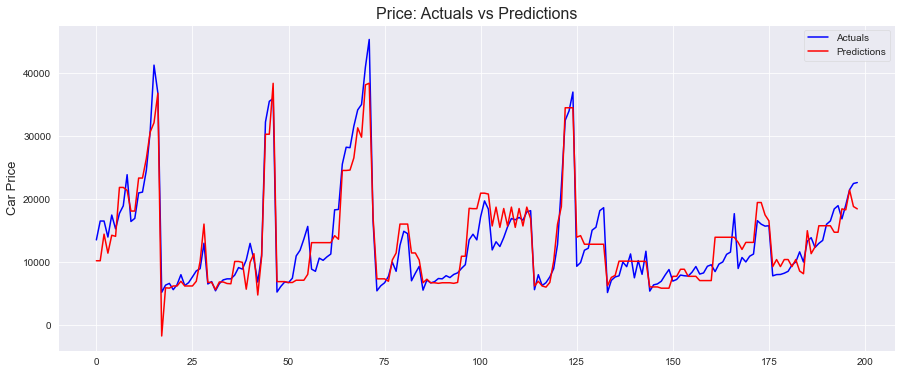

In [42]:
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=y_new_cv.index,y=y_new_cv,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_new_cv.index,y=y_predictions,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions', fontsize=16)
ax.set_ylabel('Car Price',fontsize=13)

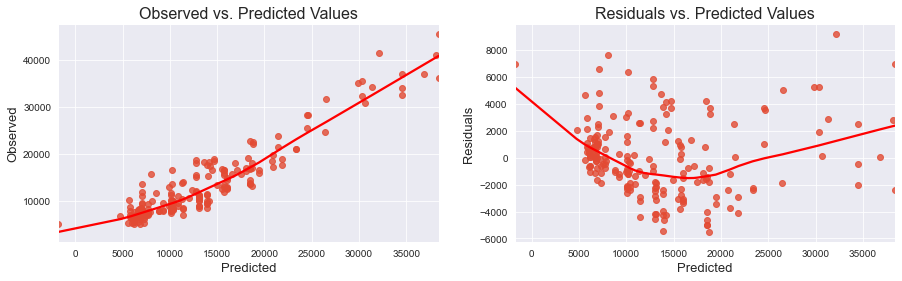

In [43]:


linearity_test(lm_sm,y_new_cv)

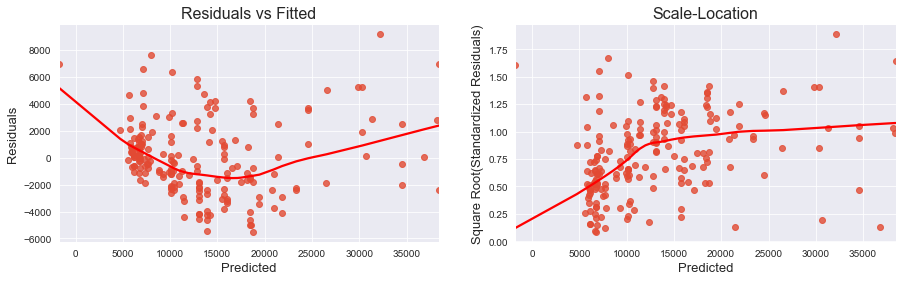

In [44]:
homoscedasticity_test(lm_sm)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


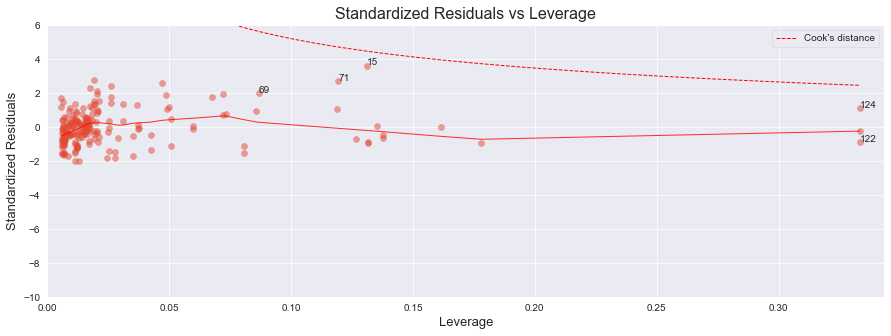

In [45]:
influential_outlier_test(model=lm_sm,top_influencing_obs_count=5)

#looks fine not influential outlier

Jarque-Bera test ---- statistic: 11.1716, p-value: 0.0037508223861641987
Shapiro-Wilk test ---- statistic: 0.9788, p-value: 0.0042
Kolmogorov-Smirnov test ---- statistic: 0.5327, p-value: 0.0000
Anderson-Darling test ---- statistic: 1.0358, 5% critical value: 0.7720
If the returned Anderson Draling statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


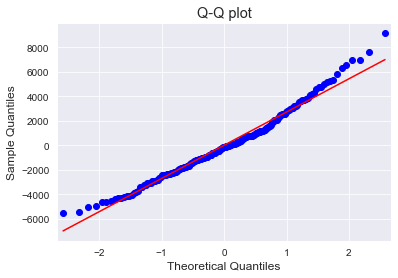

In [46]:
normality_of_residuals_test(lm_sm)

#Q-Q plot shows residuals is mostly normal except at upper tail

#Since normality is not a strict assumption and close to normal distribution is fine, its safe to ignore the upper tail

#https://stats.stackexchange.com/questions/152674/why-is-the-normality-of-residuals-barely-important-at-all-for-the-purpose-of-e

### model has 88% accuracy with almost satisfying main assumptions of linear regression.

### references:
#### 1.git hub projects as this is my first ever end to end  m.l project
#### 2.https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0


In [52]:
!jupyter nbconvert --to html "finalautomodel.ipynb"

[NbConvertApp] Converting notebook finalautomodel.ipynb to html
[NbConvertApp] Writing 1409881 bytes to finalautomodel.html


In [51]:
!jt -r

Reset css and font defaults in:
C:\Users\hp\.jupyter\custom &
C:\Users\hp\AppData\Roaming\jupyter\nbextensions
